In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('data/hearts_data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,0,132,0,1.2,0,1
914,68,1,0,144,193,1,0,141,0,3.4,0,1
915,57,1,0,130,131,0,0,115,1,1.2,0,1
916,57,0,1,130,236,0,2,174,0,0.0,0,1
917,38,1,2,138,175,0,0,173,0,0.0,1,0


In [5]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.567538,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [7]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [8]:
df.groupby('HeartDisease').mean()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,50.551220,0.651220,1.192683,130.180488,227.121951,0.107317,0.548780,148.151220,0.134146,0.408049,0.841463
1,55.899606,0.901575,0.448819,134.185039,175.940945,0.334646,0.647638,127.655512,0.622047,1.274213,0.346457


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
correaltion = df.corr()
print (correaltion)

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG      0.213152 -0.018343       0.020229   0.097661     0.112095   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.093424 -0.066831       0.130916  -0.083418     0.007110   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

<AxesSubplot: >

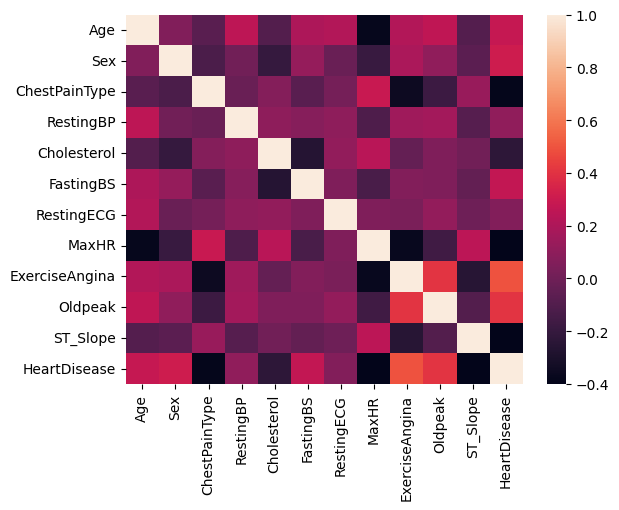

In [11]:
sns.heatmap(correaltion)

In [12]:
x = df.drop(columns='HeartDisease',axis=1)
y = df['HeartDisease']

In [13]:
print(x.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              2        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              0        138          214          0           0   
4   54    1              2        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         1  
1    156               0      1.0         0  
2     98               0      0.0         1  
3    108               1      1.5         0  
4    122               0      0.0         1  


In [14]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)

In [16]:
print(x_train.shape,x_test.shape)

(642, 11) (276, 11)


In [17]:
###using logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\sovon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
prediction = model.predict(x_test)
print(prediction)

[1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1]


In [19]:
accuracy = accuracy_score(prediction,y_test)
print(accuracy)

0.855072463768116


In [ ]:
import pickle
filename = 'heart-disease-prediction-model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [24]:
input_data = (37,1,0,140,207,0,0,130,1,1.5,0)
input_data_numpyarr = np.asarray(input_data)
input_data_reshape = input_data_numpyarr.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction[0])

1


In [19]:
classify = svm.SVC()
classify.fit(x_train,y_train)

SVC()

In [20]:
x_train_pred = classify.predict(x_train)
train_acc = accuracy_score(x_train_pred,y_train)
print(train_acc)

0.721183800623053


In [21]:
x_test_pred = classify.predict(x_test)
train_acc = accuracy_score(x_test_pred,y_test)
print(train_acc)

0.7355072463768116


In [22]:
input_data = (48,0,	0,138,214,0,1,108,1,1.5,1)
input_data_numpyarr = np.asarray(input_data)
input_data_reshape = input_data_numpyarr.reshape(1,-1)

In [23]:
prediction = classify.predict(input_data_reshape)
if prediction[0] == 0:
    print ("No Heart Disease detected")
else:
    print ("Heart Disease detected")

Heart Disease detected


c:\Users\sovon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
